# **Social Network Ads - Decision Tree and Random Forest**

# **1. Decision Tree**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 **1. Data Pre-Processing :**

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


 **2. Fitting Decision Tree Algorithm using Training Data :**

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df.drop('Purchased', axis=1)
Y = df['Purchased']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

classifier = DecisionTreeClassifier(criterion='entropy')
model = classifier.fit(x_train, y_train)


 **3. Predicting the Test Set Results :**

In [10]:
y_pred = classifier.predict(x_test)

 **4. Evaluate Performance of the Model :**

In [11]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [12]:
mat = confusion_matrix(y_test, y_pred)
mat

array([[48,  4],
       [ 6, 22]], dtype=int64)

In [13]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        52
           1       0.85      0.79      0.81        28

    accuracy                           0.88        80
   macro avg       0.87      0.85      0.86        80
weighted avg       0.87      0.88      0.87        80



In [14]:
score = accuracy_score(y_test, y_pred)
print(score)

0.875


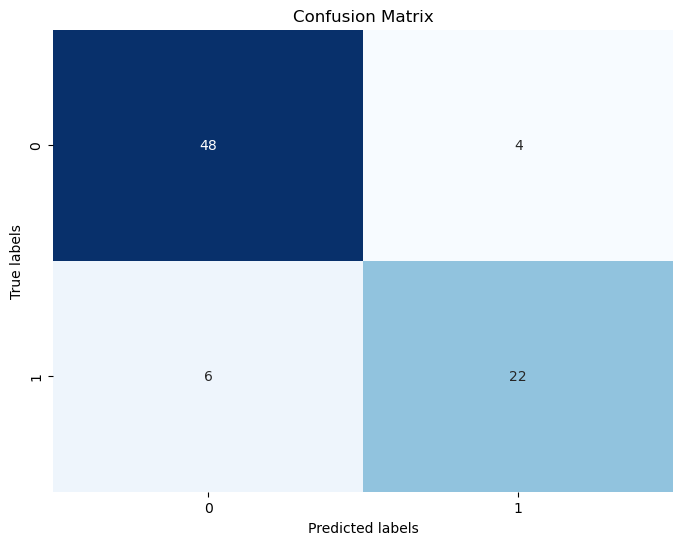

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        52
           1       0.85      0.79      0.81        28

    accuracy                           0.88        80
   macro avg       0.87      0.85      0.86        80
weighted avg       0.87      0.88      0.87        80



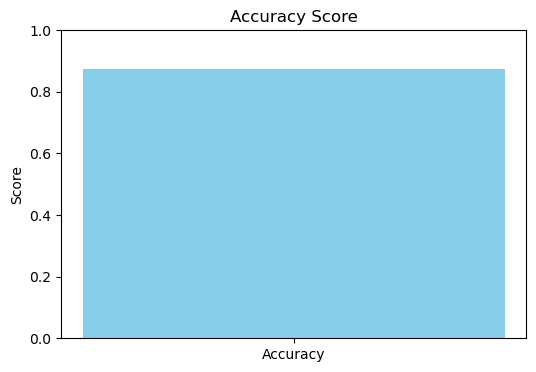

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report Visualization
print("Classification Report:")
print(report)

# Accuracy Score Visualization
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [score], color='skyblue')
plt.title('Accuracy Score')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()


 **5. Plot the Decision Tree :**

In [16]:
from sklearn import tree

[Text(0.4827586206896552, 0.9642857142857143, 'x[2] <= 44.5\nentropy = 0.942\nsamples = 320\nvalue = [205, 115]'),
 Text(0.25862068965517243, 0.8928571428571429, 'x[3] <= 90500.0\nentropy = 0.688\nsamples = 234\nvalue = [191, 43]'),
 Text(0.10344827586206896, 0.8214285714285714, 'x[2] <= 36.5\nentropy = 0.225\nsamples = 193\nvalue = [186.0, 7.0]'),
 Text(0.06896551724137931, 0.75, 'entropy = 0.0\nsamples = 126\nvalue = [126, 0]'),
 Text(0.13793103448275862, 0.75, 'x[3] <= 67500.0\nentropy = 0.483\nsamples = 67\nvalue = [60, 7]'),
 Text(0.10344827586206896, 0.6785714285714286, 'entropy = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.1724137931034483, 0.6785714285714286, 'x[0] <= 15578509.0\nentropy = 0.734\nsamples = 34\nvalue = [27, 7]'),
 Text(0.13793103448275862, 0.6071428571428571, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.20689655172413793, 0.6071428571428571, 'x[0] <= 15752160.5\nentropy = 0.625\nsamples = 32\nvalue = [27, 5]'),
 Text(0.1724137931034483, 0.53571428571

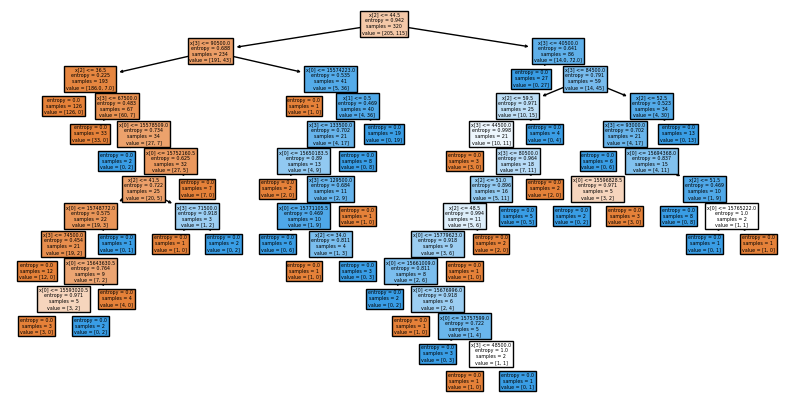

In [17]:
plt.figure(figsize = (10,5))
tree.plot_tree(model, filled=True)

# **2. Random Forest**

 **1. Fitting Random Forest Classifier on Training Data :**

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rfc = RandomForestClassifier(n_estimators = 600)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=600)

 **2. Predicting the Test Set Results :**

In [20]:
y_pred = rfc.predict(x_test)

 **3. Model Evaluation :**

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [22]:
mat = confusion_matrix(y_test, y_pred)
mat

array([[47,  5],
       [ 1, 27]], dtype=int64)

In [23]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        52
           1       0.84      0.96      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



In [24]:
score = accuracy_score(y_test, y_pred)
print(score)

0.925


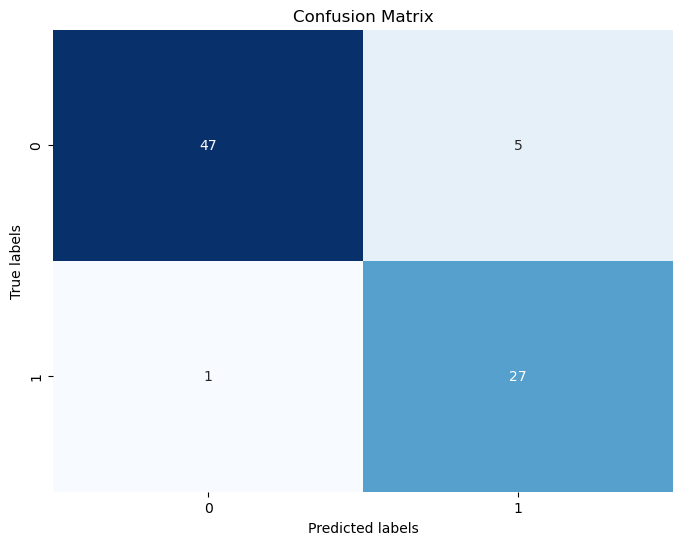

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        52
           1       0.84      0.96      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



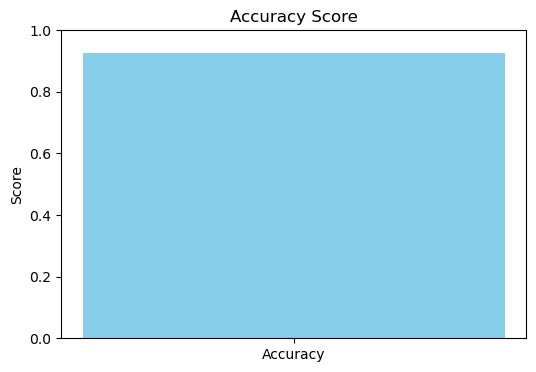

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report Visualization
print("Classification Report:")
print(report)

# Accuracy Score Visualization
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [score], color='skyblue')
plt.title('Accuracy Score')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()


# **Red Wine Quality Prediction using Random Forest**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 **1. Data Pre-processing :**

In [27]:
df = pd.read_csv('winequality-red.csv')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [29]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


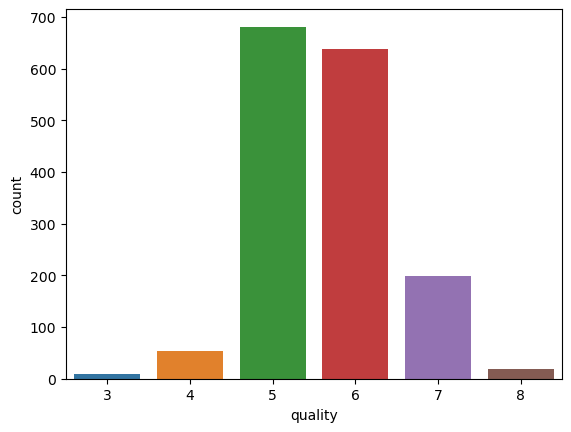

In [32]:
import seaborn as sns
sns.countplot(x='quality', data=df)
plt.show()

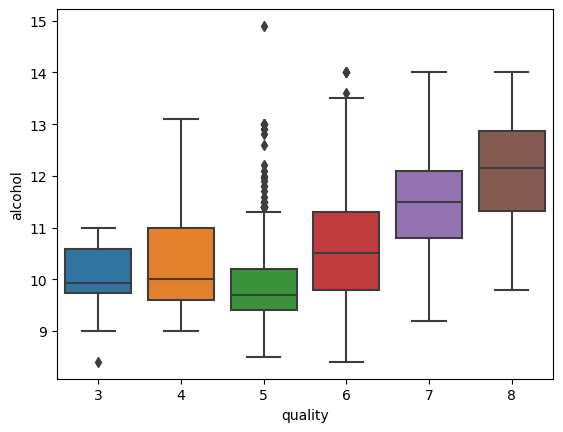

In [33]:
sns.boxplot(x='quality', y='alcohol', data=df)
plt.show()

In [34]:
X = df.drop('quality', axis=1)
Y = df['quality']

In [35]:
# Train-Test-Split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

**2. Fitting Random Forest Algorithm to Training Data :**

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy')
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

**3. Predicting Test Set Results :**

In [38]:
y_pred = classifier.predict(x_test)

**4. Evaluate Performance of Model :**

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [40]:
mat = confusion_matrix(y_test, y_pred)
mat

array([[ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  7,  3,  0,  0],
       [ 0,  2, 98, 30,  0,  0],
       [ 0,  0, 40, 81, 11,  0],
       [ 0,  0,  1, 19, 21,  1],
       [ 0,  0,  0,  2,  3,  0]], dtype=int64)

In [41]:
score = accuracy_score(y_test, y_pred)
score

0.625

In [42]:
report = classification_report(y_test, y_pred,zero_division=1)
print(report)

              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.67      0.75      0.71       130
           6       0.60      0.61      0.60       132
           7       0.60      0.50      0.55        42
           8       0.00      0.00      0.00         5

    accuracy                           0.62       320
   macro avg       0.48      0.31      0.31       320
weighted avg       0.60      0.62      0.61       320



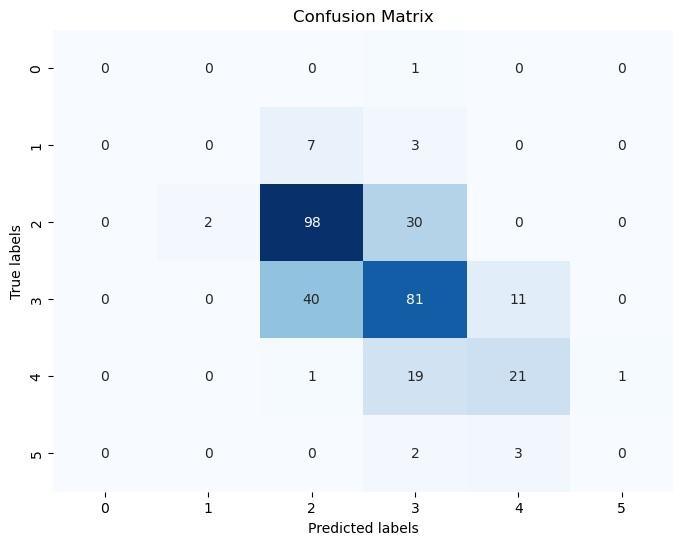

In [43]:
# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Car Evaluation Using Random Forest

In [44]:
df = pd.read_csv("car_evaluation.csv")

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [46]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [47]:
df.shape

(1727, 7)

In [48]:
col_names = ['paint', 'break', 'alloy', 'wheel', 'headlight', 'gear', 'engine']
df.columns = col_names
col_names

['paint', 'break', 'alloy', 'wheel', 'headlight', 'gear', 'engine']

In [49]:
df.head()

,paint,break,alloy,wheel,headlight,gear,engine
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [50]:
col_names = ['paint', 'break', 'alloy', 'wheel', 'headlight', 'gear', 'engine']

for col in col_names:
  print(df[col].value_counts())

high     432
med      432
low      432
vhigh    431
Name: paint, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: break, dtype: int64
3        432
4        432
5more    432
2        431
Name: alloy, dtype: int64
4       576
more    576
2       575
Name: wheel, dtype: int64
med      576
big      576
small    575
Name: headlight, dtype: int64
med     576
high    576
low     575
Name: gear, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: engine, dtype: int64


In [51]:
df['engine'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: engine, dtype: int64

In [52]:
df.isnull().sum()

paint        0
break        0
alloy        0
wheel        0
headlight    0
gear         0
engine       0
dtype: int64

In [53]:
X = df.drop(['engine'],axis=1)
y = df['engine']

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [55]:
X_train.shape, X_test.shape

((1381, 6), (346, 6))

In [56]:
# Perform one-hot encoding using pd.get_dummies() on the original DataFrame
X_train_encoded = pd.get_dummies(X_train, columns=['paint', 'break', 'alloy', 'wheel', 'headlight', 'gear'])
X_test_encoded = pd.get_dummies(X_test, columns=['paint', 'break', 'alloy', 'wheel', 'headlight', 'gear'])


In [57]:
X_train.head()

,paint,break,alloy,wheel,headlight,gear
107,vhigh,high,2,2,small,low
900,med,vhigh,3,4,small,med
1708,low,low,5more,2,big,high
705,high,med,4,2,med,med
678,high,med,3,2,med,med


In [58]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over categorical columns and apply label encoding
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

# Now, you can fit the Random Forest model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [59]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier

model = RandomForestClassifier(random_state=0)

# fit the model

model.fit(X_train, y_train)

# Predict the Test set results

y_pred = model.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9595375722543352


In [61]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[ 73   1   2   1]
 [  3   9   0   3]
 [  2   0 235   0]
 [  2   0   0  15]]


In [62]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         acc       0.91      0.95      0.93        77
        good       0.90      0.60      0.72        15
       unacc       0.99      0.99      0.99       237
       vgood       0.79      0.88      0.83        17

    accuracy                           0.96       346
   macro avg       0.90      0.86      0.87       346
weighted avg       0.96      0.96      0.96       346



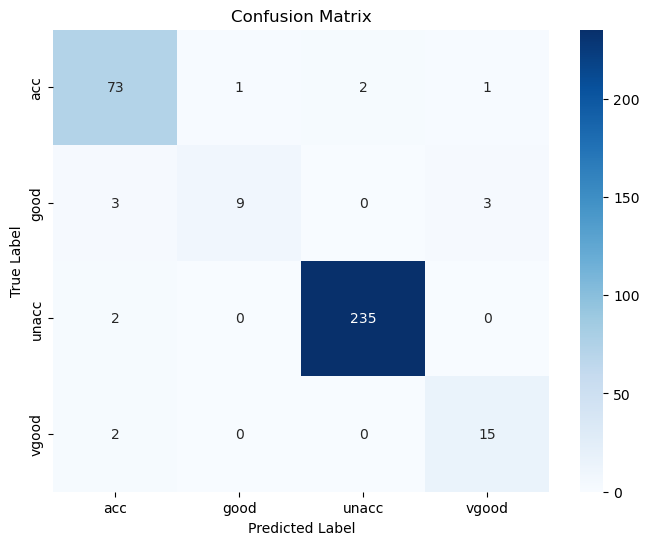

In [63]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Iris Data using Random Forest

In [64]:
df = pd.read_csv('IRIS.csv')

In [65]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [67]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [68]:
df['species'] = df['species'].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [70]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [71]:
X = df.drop('species', axis=1)
Y = df['species']

In [72]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.20, random_state=42)

In [73]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy')
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [76]:
y_pred = classifier.predict(x_test)

In [77]:
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

,Actual,Predicted
73,2,2
18,1,1
118,3,3
78,2,2
76,2,2
31,1,1
64,2,2
141,3,3
68,2,2
82,2,2


In [78]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
mat

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [79]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


In [80]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

